In [1]:
import prody as pr
import numpy as np
from itertools import product
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
P1 = pr.parsePDB('5x8q')
P2 = pr.parsePDB('5x8w')

@> PDB file is found in working directory (5x8q.pdb).
@> 8287 atoms and 1 coordinate set(s) were parsed in 0.05s.
@> PDB file is found in working directory (5x8w.pdb).
@> 2215 atoms and 1 coordinate set(s) were parsed in 0.01s.


In [3]:
S1 = P1.select('chain A')
S2 = P2.select('chain A')

In [4]:
site_resnums = []
ligand = P1.select('resname 82R and chain A')

for atom in P1.select('name CA and chain A'):
    for lig_atom in P1.select('resname 82R and chain A'):
        if pr.calcDistance(lig_atom, atom) <= 5:
            site_resnums.append(atom.getResnum())

site_resnums = np.unique(site_resnums)

In [5]:
mean_betas_1 = []
mean_betas_2 = []

for sel, lst in zip((P1['A'], P2['A']), (mean_betas_1, mean_betas_2)):
    for residue in sel.iterResidues():
        if 'CA' in residue.getNames():
            mean_beta = np.mean(residue.getBetas())
            lst.append((residue, mean_beta))

In [6]:
scaffold_mean_betas_1_sorted = []
scaffold_mean_betas_2_sorted = []
site_mean_betas_1_sorted = []
site_mean_betas_2_sorted = []

for entry_1, entry_2 in product(mean_betas_1, mean_betas_2):
    if entry_1[0].getResnum() == entry_2[0].getResnum():
        if entry_1[0].getResnum() in site_resnums:
            site_mean_betas_1_sorted.append(entry_1[1])
            site_mean_betas_2_sorted.append(entry_2[1])
        else:
            scaffold_mean_betas_1_sorted.append(entry_1[1])
            scaffold_mean_betas_2_sorted.append(entry_2[1])

scaffold_mean_betas_1_sorted_scaled = stats.zscore(scaffold_mean_betas_1_sorted)
scaffold_mean_betas_2_sorted_scaled = stats.zscore(scaffold_mean_betas_2_sorted)
site_mean_betas_1_sorted_scaled = stats.zscore(site_mean_betas_1_sorted)
site_mean_betas_2_sorted_scaled = stats.zscore(site_mean_betas_2_sorted)

In [7]:
sorted(mean_betas_1, key=lambda x:x[1])[0]

(<Residue: VAL 331 from Chain A from 5x8q (7 atoms)>, 23.304285714285715)

In [8]:
sorted(mean_betas_2, key=lambda x:x[1])[0]

(<Residue: VAL 360 from Chain A from 5x8w (7 atoms)>, 18.678571428571427)

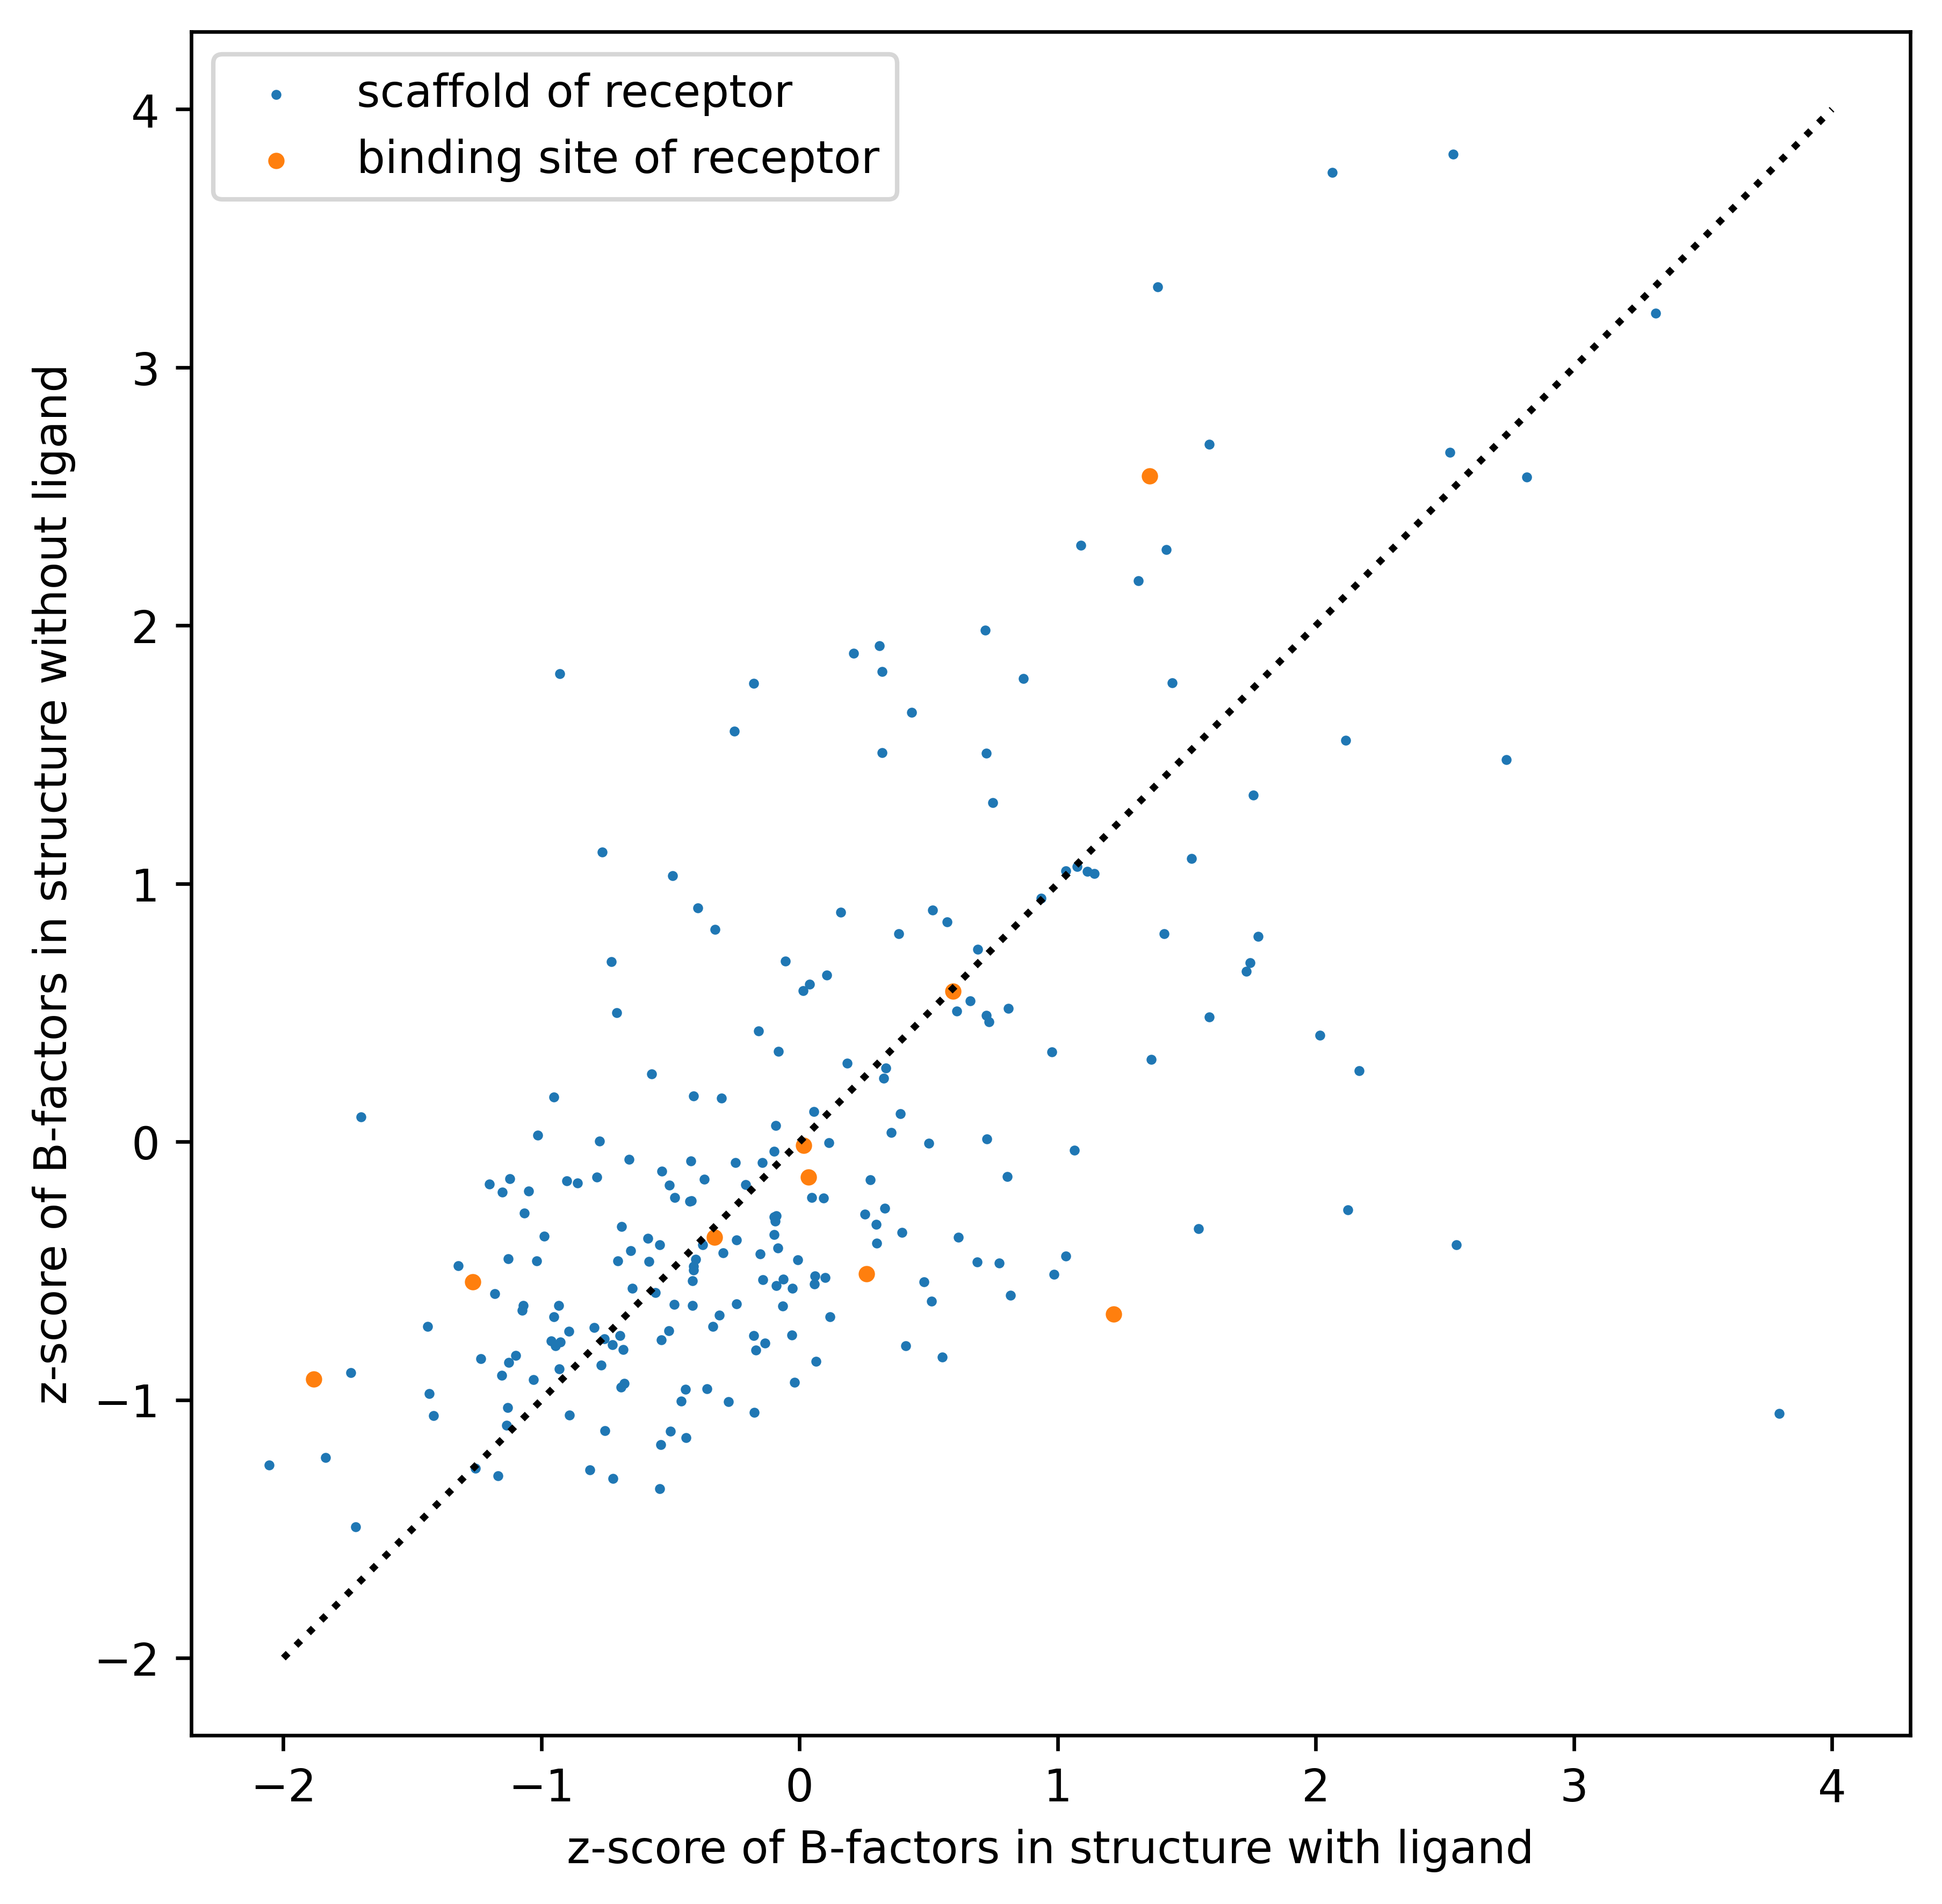

In [13]:
fig = plt.figure(figsize=(7, 7), dpi=600)
ax = fig.add_subplot(1,1,1, adjustable='box', aspect=1)
ax.scatter(scaffold_mean_betas_1_sorted_scaled, scaffold_mean_betas_2_sorted_scaled, s=1.5, label="scaffold of receptor")
ax.scatter(site_mean_betas_1_sorted_scaled, site_mean_betas_2_sorted_scaled, s=7, label="binding site of receptor")
ax.plot([-2, 4], [-2, 4], ":", color='black')
ax.set_xlabel('z-score of B-factors in structure with ligand')
ax.set_ylabel('z-score of B-factors in structure without ligand')
ax.legend(loc='best')
plt.savefig("b_factor_plot.png")